In [325]:
import numpy as np
import matplotlib.pyplot as plt

def iterateValue(value, getStatesIter, getActionsIter, getStateTransitionsIter, 
                 max_iter=None, Theta=1.0e-5):
    it = 1
    while True:
        delta = 0.0
        print("Iteration {}".format(it), end="", flush=True)
        new_value = np.array(value)
        for state in getStatesIter():
            #v = value[state]
            max_qsa = BIG_NEGATIVE_VALUE
            for action in getActionsIter(state):
                dist = getStateTransitionsIter(state,action)
                qsa = np.sum([prob*(reward + gamma*value[next_state])
                               for next_state, prob, reward in dist])
                if qsa > max_qsa:
                    max_qsa = qsa
            new_value[state] = max_qsa
            #print("value[{}]={}".format(state,max_qsa))
            delta = max(delta, abs(value[state]-new_value[state]))
            #print(".", end="", flush=True)
        print("[Done] delta={}".format(delta))
        if max_iter and it >= max_iter or delta < Theta: break
        it += 1
    return new_value

def iterateInplace(value, getStatesIter, getActionsIter, getStateTransitionsIter, 
                 max_iter=None, Theta=1.0e-5):
    it = 1
    while True:
        delta = 0.0
        print("Iteration {}".format(it), end="", flush=True)
        for state in getStatesIter():
            v = value[state]
            max_qsa = np.float64(BIG_NEGATIVE_VALUE)
            for action in getActionsIter(state):
                dist = getStateTransitionsIter(state,action)
                qsa = np.sum([prob*(reward + gamma*value[next_state])
                               for next_state, prob, reward in dist])
                if qsa > max_qsa:
                    max_qsa = qsa
            value[state] = max_qsa
            #print("value[{}]={}".format(state,max_qsa))
            delta = max(delta, abs(value[state]-v))
            #print(".", end="", flush=True)
        print("[Done] delta={}".format(delta))
        if max_iter and it >= max_iter or delta < Theta: break
        it += 1
    return value

def getPolicy(value, policy, getStatesIter, getActionsIter, getStateTransitionsIter):
    for state in getStatesIter():
        max_qsa = BIG_NEGATIVE_VALUE
        for action in getActionsIter(state):
            dist = getStateTransitionsIter(state,action)
            qsa = np.sum([prob*(reward + gamma*value[next_state])
                           for next_state, prob, reward in dist])
            if qsa > max_qsa:
                max_qsa = qsa
                policy[state] = action
    
def getPolicy2(value, policy, getStatesIter, getActionsIter, getStateTransitionsIter):
    for state in getStatesIter():
        max_qsa = np.float64(BIG_NEGATIVE_VALUE)
        for action in getActionsIter(state):
            dist = getStateTransitionsIter(state,action)
            qsa = np.sum([prob*(reward + gamma*value[next_state])
                           for next_state, prob, reward in dist])
            if qsa > max_qsa+1.0e-15:
                max_qsa = qsa
                policy[state] = action    

In [311]:
def getGamblerStatesIter():
    return range(1,goal)

def getGamblerActionsIter(state):
    return range(1,min(state,goal-state)+1)

def all_actions(state):
    return range(state+1)

def all_transitions(state,action):
    return iter([(state-action, 1.0-win_prob, 0.0),
            (min(state+action,goal), win_prob, float(state+action >= goal))])

def getGamblerTransitionsIter(state,action):
    return iter([(state-action, 1.0-win_prob, 0.0),
            (state+action, win_prob, 0.0)])

In [312]:
goal = 100
win_prob = 0.4
gamma = 1.0
BIG_NEGATIVE_VALUE = -1.0e19
value = np.zeros(goal+1, dtype=np.float64)
value[goal] = 1.0
policy = np.zeros(goal, dtype=np.int)

In [313]:
result = iterateInplace(value, getGamblerStatesIter, getGamblerActionsIter,
                  getGamblerTransitionsIter, max_iter=100, Theta=1.0e-22)

Iteration 1[Done] delta=0.9533440000000001
Iteration 2[Done] delta=0.3688960000000001
Iteration 3[Done] delta=0.13926400000000005
Iteration 4[Done] delta=0.05570560000000002
Iteration 5[Done] delta=0.02228224000000001
Iteration 6[Done] delta=0.008912896000000003
Iteration 7[Done] delta=0.0016384000000000008
Iteration 8[Done] delta=0.0003932160000000005
Iteration 9[Done] delta=7.602595430399994e-05
Iteration 10[Done] delta=3.041038172160032e-05
Iteration 11[Done] delta=2.6418075402233343e-06
Iteration 12[Done] delta=9.045549017728909e-07
Iteration 13[Done] delta=7.815354352569415e-08
Iteration 14[Done] delta=1.8756850440893036e-08
Iteration 15[Done] delta=5.230363003816407e-09
Iteration 16[Done] delta=1.869841788348925e-09
Iteration 17[Done] delta=7.479367151660976e-10
Iteration 18[Done] delta=1.8698417900836484e-10
Iteration 19[Done] delta=4.8203025772297625e-11
Iteration 20[Done] delta=1.928121030891905e-11
Iteration 21[Done] delta=1.6749952119754496e-12
Iteration 22[Done] delta=5.735

In [165]:
result = iterateInplace(value, getGamblerStatesIter, all_actions,#getGamblerActionsIter,
                  all_transitions, max_iter=100)#, Theta=0.001)

Iteration 1[Done] delta=0.8480044007301331
Iteration 2[Done] delta=0.29866963624954224
Iteration 3[Done] delta=0.1031130850315094
Iteration 4[Done] delta=0.03712071105837822
Iteration 5[Done] delta=0.013363456353545189
Iteration 6[Done] delta=0.004810844082385302
Iteration 7[Done] delta=0.0009352285414934158
Iteration 8[Done] delta=0.00018180906772613525
Iteration 9[Done] delta=6.54514878988266e-05
Iteration 10[Done] delta=2.3562461137771606e-05
Iteration 11[Done] delta=8.482486009597778e-06


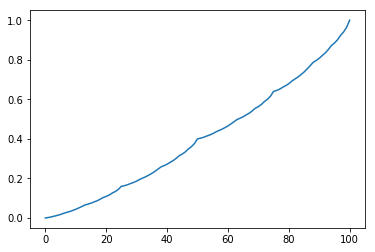

In [285]:
value = result
plt.plot(result)

In [326]:
getPolicy2(value, policy, getGamblerStatesIter, getGamblerActionsIter, getGamblerTransitionsIter)

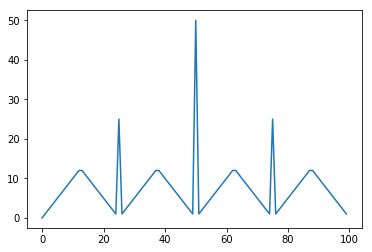

In [327]:
plt.plot(policy)

In [280]:
def getQ(value, q, getStatesIter, getActionsIter, getStateTransitionsIter):
    for state in getStatesIter():
        for action in getActionsIter(state):
            dist = getStateTransitionsIter(state,action)
            q[state,action] = np.sum([prob*(reward + gamma*value[next_state])
                           for next_state, prob, reward in dist])


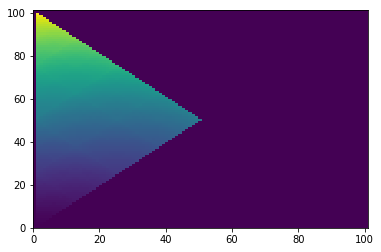

In [281]:
q_func = np.zeros(shape = (goal+1,goal+1,), dtype = np.float32)
getQ(value, q_func, getGamblerStatesIter, getGamblerActionsIter, getGamblerTransitionsIter)
plt.pcolor(q_func)

In [330]:
policy[76],q_func[76]

(1, array([0.        , 0.64464766, 0.6340361 , 0.6278411 , 0.6249444 ,
        0.62112725, 0.61882555, 0.6178771 , 0.614708  , 0.6130671 ,
        0.6139386 , 0.6148814 , 0.6172972 , 0.6172972 , 0.6148814 ,
        0.6139386 , 0.6130671 , 0.614708  , 0.6178771 , 0.61882555,
        0.62112725, 0.6249444 , 0.6278411 , 0.6340361 , 0.64464766,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0